In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


# Computer Vision



In [ ]:
# Import Tensorflow 2.0
# !pip install tensorflow
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

## 1.0 CIFAR100  dataset

https://www.tensorflow.org/datasets/catalog/cifar100

Let's download and load the dataset and display a few random samples from it:



In [ ]:
cifar100  = tf.keras.datasets.cifar100
(train_images, train_labels), (test_images, test_labels) = cifar100 .load_data()


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [ ]:
print(type(train_images))
print(train_images.shape)
print(type(train_labels))
print(train_labels.shape)

<class 'numpy.ndarray'>
(50000, 32, 32, 3)
<class 'numpy.ndarray'>
(50000, 1)


In [ ]:
print(type(test_images))
print(test_images.shape)
print(type(test_labels))
print(test_labels.shape)

<class 'numpy.ndarray'>
(10000, 32, 32, 3)
<class 'numpy.ndarray'>
(10000, 1)


In [ ]:
train_images = (train_images/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (test_images/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)



Let's visualize what some of these images and their corresponding training labels look like.

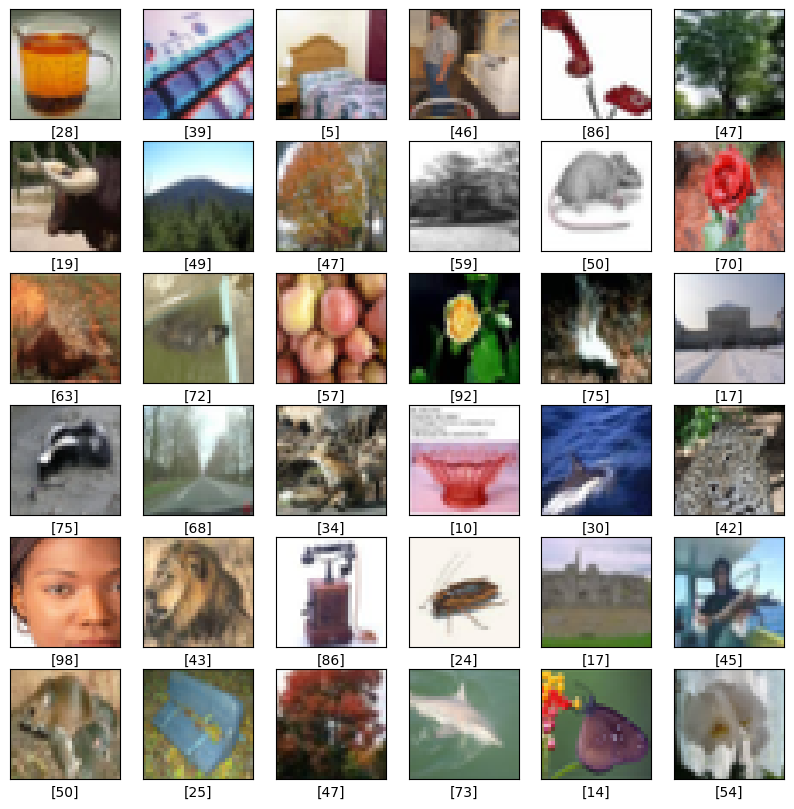

In [ ]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(50000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])


In [ ]:
# List of CIFAR-100 labels
str_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum',
    'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark',
    'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel',
    'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone',
    'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle',
    'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

# Function to get the label by class number
def get_label(class_number):
    return str_labels[class_number]


In [ ]:
get_label(9)

'bottle'

In [ ]:
!mkdir test_images

In [ ]:
# Download 10 random test images and name them accordingly
import os

for i in range(10):
  random_index = random.randint(0, len(test_images) - 1)
  image = test_images[random_index]
  label = test_labels[random_index][0]
  label_name = get_label(label)
  plt.imsave(os.path.join('test_images', f"{label_name}.png"), image)

## 2.0 Neural Network for CIFA100 Classification

**Objective** is to

1. build a neural network for classifying images.

2. train the neural network model.

3. evaluate the model.





### Fully connected neural network architecture




In [ ]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      # First define a Flatten layer
      tf.keras.layers.Flatten(), ## Input Pixels

      ## TO DO: Define the network architecture.

      ## YOUR CODES:

        # Hidden layer(s)
        tf.keras.layers.Dense(1024, activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.10),

        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.10),

        tf.keras.layers.Dense(256, activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.10),

        # tf.keras.layers.Dense(128, activation=tf.nn.relu),
        # tf.keras.layers.Dropout(0.25),

      ## END OF YOUR CODES


      tf.keras.layers.Dense(100, activation=tf.nn.softmax) ## Output Layers


  ])
  return fc_model

model = build_fc_model()



### Compile the model



In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Model Summary

In [ ]:
## TO DO: Print out the summary of the built network.

## YOUR CODES:
model.build(input_shape=(None, 32, 32, 3))
model.summary()

## END OF YOUR CODES




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,828,580 (14.60 MB)

 Trainable params: 3,828,580 (14.60 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model



In [ ]:
## TO DO: Model training

## YOUR CODES:
from tensorflow.keras.callbacks import EarlyStopping

BATCH_SIZE = 128
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
EPOCHS = 100

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[early_stopping])

## END OF YOUR CODES



Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.0366 - loss: 4.4233
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0886 - loss: 3.9741
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1226 - loss: 3.7712
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1422 - loss: 3.6607
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1647 - loss: 3.5424
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1751 - loss: 3.4742
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1868 - loss: 3.3966
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1948 - loss: 3.3577
Epoch 9/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2099 - loss: 3.2762
Epoch 10/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2162 - loss: 3.2338
Epoch 11/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2226 - loss: 3.1935
Epoch 12/100
391/391 ━━━━━━━━━━━━━━━━━━━━

### Evaluate accuracy on the test dataset



In [ ]:
## TO DO: Evaluate the model on the test dataset

## YOUR CODES:
'''TODO: Use the evaluate method to test the model!'''
test_loss, test_acc = model.evaluate(test_images, test_labels) # TODO
# test_loss, test_acc = # TODO

print('Test loss:', test_loss, 'Test accuracy:', test_acc)

## END OF YOUR CODES


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2663 - loss: 4.3269
Test loss: 4.3266754150390625 Test accuracy: 0.2694000005722046


## 3.0 Convolutional Neural Network (CNN)

In [ ]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

      ## TO DO: Define the network architecture.

      ## YOUR CODES:

      tf.keras.layers.Conv2D(filters=128, padding="same", kernel_size=(3,3), activation=tf.nn.relu, input_shape=(32, 32, 3)),
      tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation=tf.nn.relu),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Dropout(0.2),

      tf.keras.layers.Conv2D(filters=256, padding="same", kernel_size=(3,3), activation=tf.nn.relu),
      tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation=tf.nn.relu),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Dropout(0.2),

      tf.keras.layers.Conv2D(filters=512 , padding="same", kernel_size=(3,3), activation=tf.nn.relu),
      tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation=tf.nn.relu),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Dropout(0.2),




      #### Fully-Connected Layer ####
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1024, activation=tf.nn.relu),
      tf.keras.layers.Dropout(0.10),

      # tf.keras.layers.Dense(512, activation=tf.nn.relu),
      # tf.keras.layers.Dropout(0.10),

      # tf.keras.layers.Dense(256, activation=tf.nn.relu),
      # tf.keras.layers.Dropout(0.10),
      ## END OF YOUR CODES

      tf.keras.layers.Dense(100, activation=tf.nn.softmax)
      # [TODO Dense layer to output classification probabilities]
    ])

    return cnn_model

cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │         102,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,777,060 (25.85 MB)

 Trainable params: 6,777,060 (25.85 MB)

 Non-trainable params: 0 (0.00 B)

None


### Train and test the CNN model



In [ ]:
cnn_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
## TO DO: Model training

## YOUR CODES:
from tensorflow.keras.callbacks import EarlyStopping


class EvaluateAtEpochEnd(tf.keras.callbacks.Callback):
    def __init__(self, test_data, train_data):
        super().__init__()
        self.test_images, self.test_labels = test_data
        self.train_images, self.train_labels = train_data
        self.epoch_train_loss = []
        self.epoch_train_accuracy = []
        self.epoch_test_loss = []
        self.epoch_test_accuracy = []

    def on_epoch_end(self, epoch, logs=None):
        # Evaluate on training data
        train_loss, train_accuracy = self.model.evaluate(self.train_images, self.train_labels, verbose=0)
        self.epoch_train_loss.append(train_loss)
        self.epoch_train_accuracy.append(train_accuracy)

        # Evaluate on test data
        test_loss, test_accuracy = self.model.evaluate(self.test_images, self.test_labels, verbose=0)
        self.epoch_test_loss.append(test_loss)
        self.epoch_test_accuracy.append(test_accuracy)
        print("\n")
        print(f"Epoch {epoch + 1}: Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
        print("\n")
# Create the custom callback with both training and test data
test_data = (test_images, test_labels)  # Ensure these variables are defined and contain the test dataset
train_data = (train_images, train_labels)  # Ensure these variables are defined and contain the training dataset
evaluate_at_epoch_end = EvaluateAtEpochEnd(test_data, train_data)

BATCH_SIZE = 128
early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)
EPOCHS = 5

history = cnn_model.fit(
    train_images,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping, evaluate_at_epoch_end]
)

## END OF YOUR CODES


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.0170 - loss: 4.5542

Epoch 1: Train Loss: 4.2970, Train Accuracy: 0.0424, Test Loss: 4.3011, Test Accuracy: 0.0437


391/391 ━━━━━━━━━━━━━━━━━━━━ 68s 144ms/step - accuracy: 0.0170 - loss: 4.5540
Epoch 2/5
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.0526 - loss: 4.2308

Epoch 2: Train Loss: 3.8822, Train Accuracy: 0.1046, Test Loss: 3.8943, Test Accuracy: 0.1023


391/391 ━━━━━━━━━━━━━━━━━━━━ 53s 97ms/step - accuracy: 0.0526 - loss: 4.2303
Epoch 3/5
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.1008 - loss: 3.8857

Epoch 3: Train Loss: 3.6759, Train Accuracy: 0.1379, Test Loss: 3.7255, Test Accuracy: 0.1305


391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 92ms/step - accuracy: 0.1009 - loss: 3.8853
Epoch 4/5
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.1509 - loss: 3.6097

Epoch 4: Train Loss: 3.3693, Train Accuracy: 0.1929, Test Loss: 3.4624, Test Accuracy: 0.1798


391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 95m

In [ ]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels) # TODO

print('Test loss:', test_loss, 'Test accuracy:', test_acc)

313/313 [==============================] - 2s 8ms/step - loss: 4.3576 - accuracy: 0.4194
Test loss: 4.357624053955078 Test accuracy: 0.41940000653266907


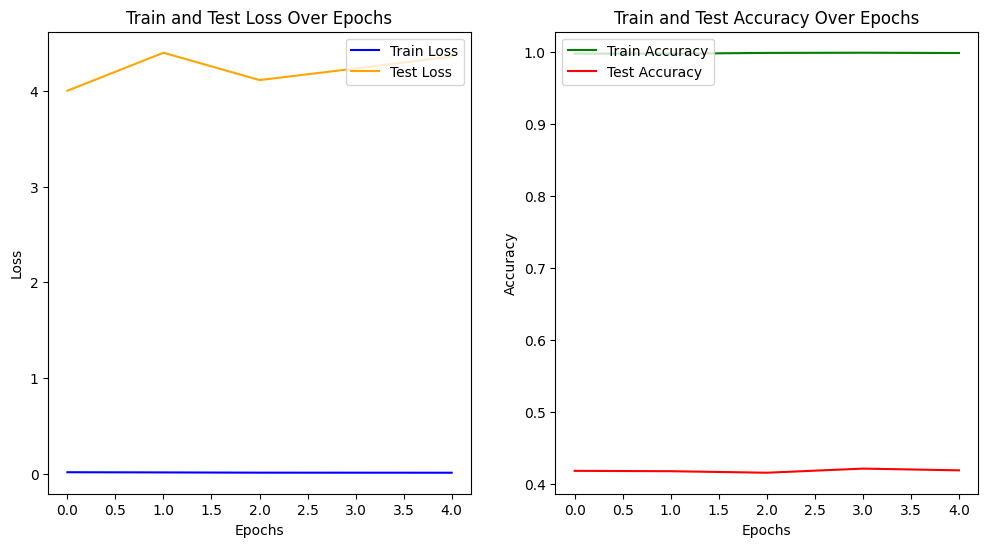

In [ ]:
# Plot the evaluation metrics
def plot_epoch_evaluation(evaluate_callback):
    epochs_range = range(len(evaluate_callback.epoch_train_loss))

    plt.figure(figsize=(12, 6))

    # Plot train loss and accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, evaluate_callback.epoch_train_loss, label='Train Loss', color='blue')
    plt.plot(epochs_range, evaluate_callback.epoch_test_loss, label='Test Loss', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train and Test Loss Over Epochs')
    plt.legend(loc='upper right')

    # Plot train and test accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, evaluate_callback.epoch_train_accuracy, label='Train Accuracy', color='green')
    plt.plot(epochs_range, evaluate_callback.epoch_test_accuracy, label='Test Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train and Test Accuracy Over Epochs')
    plt.legend(loc='upper left')

    plt.show()

# Plot the evaluation metrics
plot_epoch_evaluation(evaluate_at_epoch_end)

## 4.0 Model Deployment on Gradio

In [ ]:
## TO DO: Model deployment on Gradio

## YOUR CODES:

def classify(image):
    #base64_image = image_to_base64_str(image)

    image = tf.image.resize(image, (32, 32)) # Resize image
    image = image/255.0
    image = tf.expand_dims(image, 0)
    image = tf.reshape(image, (1, 32, 32, 3))
    result = cnn_model.predict(image)
    predicted_class = np.argmax(result, axis=1)
    predicted_label_name = str_labels[predicted_class[0]] # Get label name
    return predicted_label_name


predicted_class = classify(train_images[[23]])
print("Predicted label name:", predicted_class)

## END OF YOUR CODES


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
Predicted label name: worm


In [ ]:
# Create a Gradio interface to interactively demonstrate the image captioning functionality
import gradio as gr


demo = gr.Interface(
    fn=classify,
    inputs=gr.Image(label="Upload image", type="pil"),
    outputs=gr.Label(label="Detected Label"),
    title="Image Classification",
    description="Demo of an Image Classification model.",
    allow_flagging="never"
)


demo.launch(share=True)